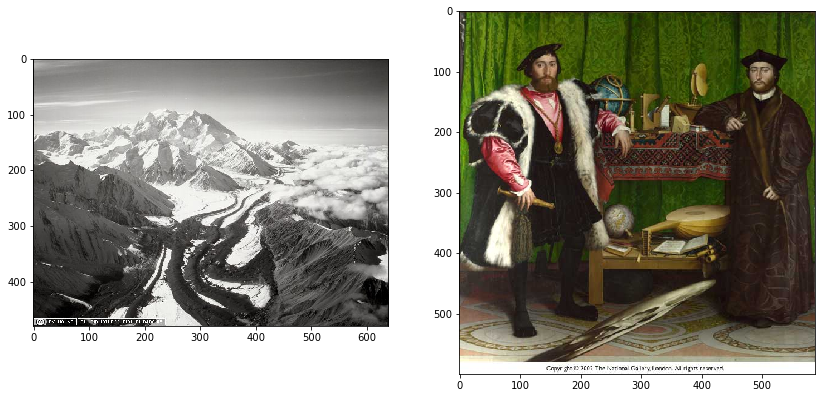

In [8]:
import skimage
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray


from affine_trans import affine_transform, rotation_matrix, normalize

img_gletscher = skimage.io.imread(fname="./gletscher.jpg")
img_ambassadors = skimage.io.imread(fname="./ambassadors.jpg")

def double_plot(img1, img2):
    fig = plt.figure(figsize=(14,7))
    fig.add_subplot(1, 2, 1)
    plt.imshow((img1*255).astype(int), cmap='gray')

    fig.add_subplot(1, 2, 2)
    plt.imshow((img2*255).astype(int), cmap='gray')

    plt.show()

double_plot(normalize(img_gletscher), normalize(img_ambassadors))


## Drehen um 30°

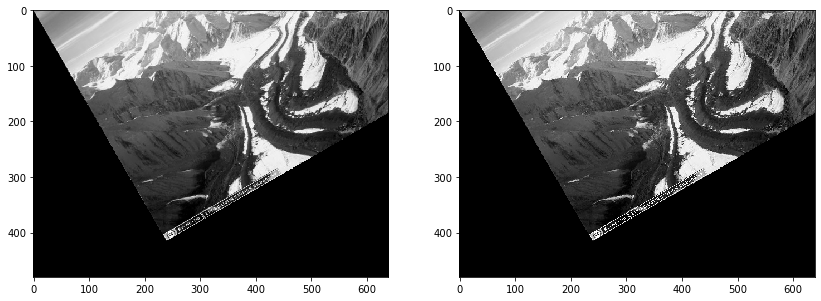

In [10]:

# image_30 = normalize(img_gletscher)
image_30_int = rgb2gray(img_gletscher) # already normalized
image_30 = rgb2gray(img_gletscher) # already normalized


A = rotation_matrix(30)

trans_image_30_int = affine_transform(image_30_int, A, interpolate=True)
trans_image_30 = affine_transform(image_30, A, interpolate=False)

double_plot(trans_image_30_int, trans_image_30)

## Verkleinern um 0.7

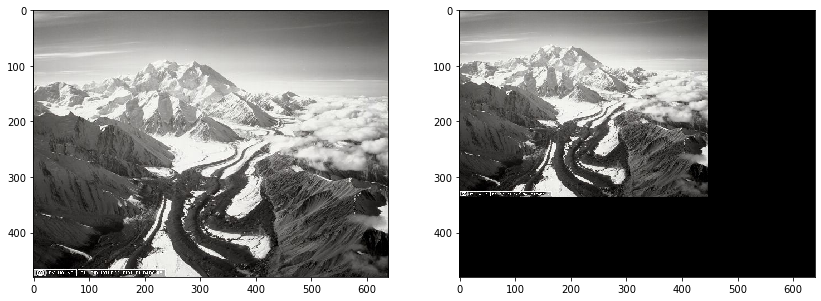

In [4]:
image = normalize(img_gletscher)

A = np.array([[0.7 ,0],[0, 0.7]])

trans_image = affine_transform(image, A, interpolate=False)

double_plot(image, trans_image)

## Verkleinern in X-Richtung um 0.8

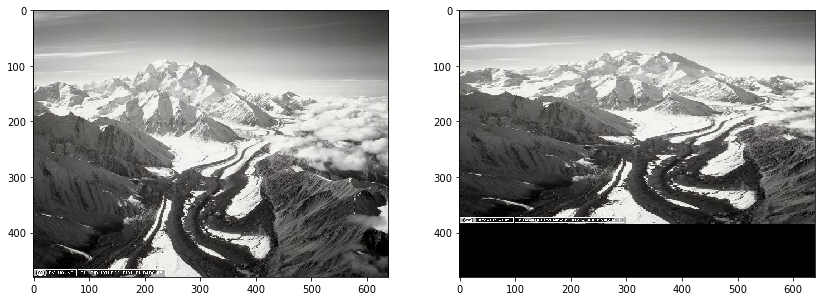

In [5]:
image = normalize(img_gletscher)

A = np.array([[0.8 ,0],[0, 1/0.8]])

trans_image = affine_transform(image, A, interpolate=False)

double_plot(image, trans_image)

## Dehnen entlang der Diagonalen um 1.5
## Stauchen senkrecht um 0.5

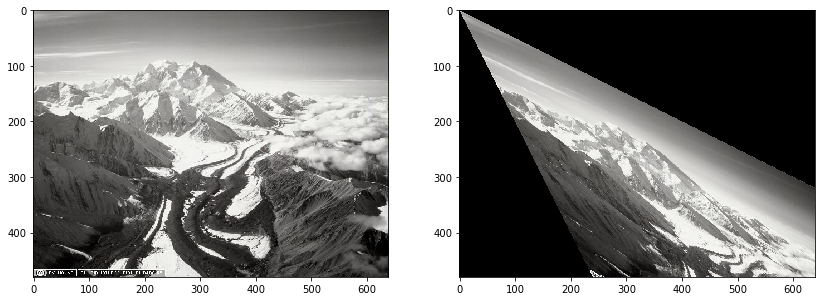

In [12]:
image = normalize(img_gletscher)

A1 = rotation_matrix(45)
A2 = np.array([[1.5 ,0],[0, 0.5]])
A3 = rotation_matrix(-45)

A = A1 @ A2 @ A3

trans_image = affine_transform(image, A, interpolate=False, xl=True)

double_plot(image, trans_image)

## Entzerren von Ambassadors

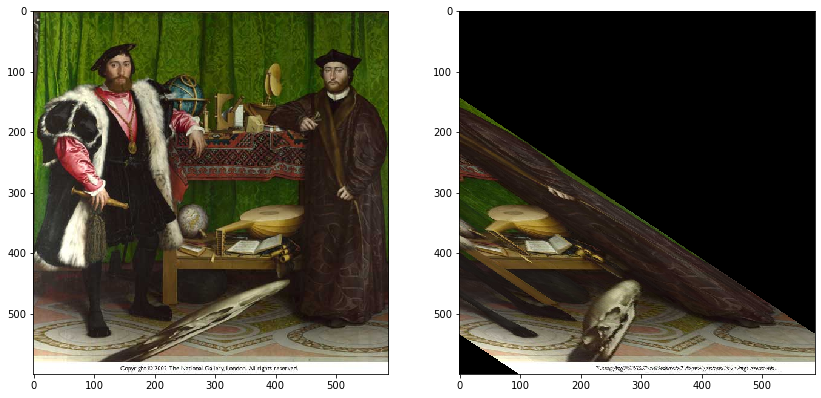

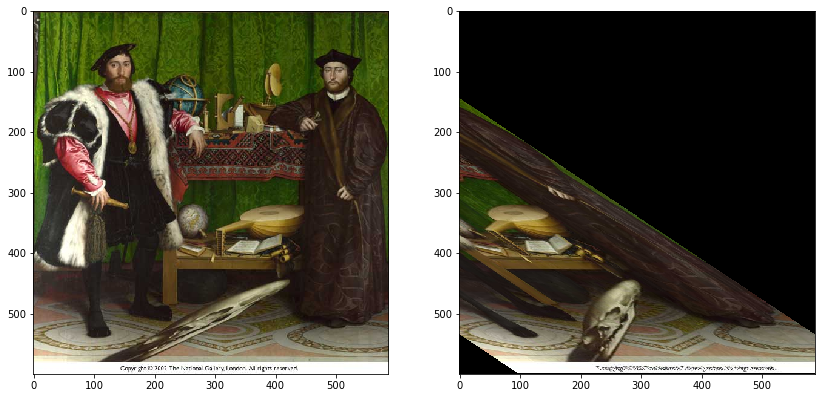

In [5]:

image = normalize(img_ambassadors)

A = np.array([[1 ,0],[1.5, 1]])
a = np.array([0, -800])

amb_image1 = affine_transform(image, A, a, interpolate=False, xl=True)
double_plot(image, amb_image1)

amb_image1_int = affine_transform(image, A, a, interpolate=True, xl=True)
double_plot(image, amb_image1_int)

